#### 코랩에서 할 것
- tensorflow 2.x 버전용 

#### 0. 사용 방법

1. 구글드라이브 colab notebook에 파일 업로드(vgg-16 안에 datafiles만)
<left><img src= "https://user-images.githubusercontent.com/87592790/207219527-7a23e493-8067-447b-8e4c-c7fec7f6055f.png" width="400" height="100">
2. 파일 열기   
  - open file  
<left><img src= "https://user-images.githubusercontent.com/87592790/207218584-1489a324-4c51-457b-9899-12a10e87cd04.png" width="500" height="250">
  - git hub 클릭 후 url 붙여넣기
  - https://github.com/LeticiaKang/HappyVirus/tree/main/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%20%EC%BD%94%EB%93%9C/VGG-16_Image_Classification  
3. Runtime - Change runtime type 에서 GPU로 바꿔주기
4. 구글드라이브 연동 코드 실행  
<left><img src= "https://user-images.githubusercontent.com/87592790/207219293-8a58863c-7da4-4a66-a980-dbae2bd0621a.png" width="300" height="100">  
5. 이후 순서대로 run
  

### 1. 구글 드라이브 연동

In [92]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


#### 1.1. Import Library¶

In [93]:
# !pip install tensorflow==2.5
# !pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#### 1.2. Load Data

In [94]:
# 구글드라이브에 있는 데이터를 불러오는 코드
train_imgs = np.load('/gdrive/MyDrive/Colab Notebooks/data_files/target_images.npy')
train_labels = np.load('/gdrive/MyDrive/Colab Notebooks/data_files/target_labels.npy')
test_imgs = np.load('/gdrive/MyDrive/Colab Notebooks/data_files/test_images.npy')
test_labels = np.load('/gdrive/MyDrive/Colab Notebooks/data_files/test_labels.npy')

# 불러온 데이트 출력해보기
# xxx_imgs : 이미지를 array로 저장한 것을 불러옴
# xxx_labels : 이미지를 one-hot 인코딩으로 저장한 것을 불러옴
print(train_imgs.shape)
print(train_labels[1])  
print(test_imgs.shape)
print(test_labels[0:4])  

# one-hot 인코딩을 0,1,2,3으로 바꿈
# train_labels = np.argmax(train_labels, axis = 1)
# print(train_labels)  
# test_labels = np.argmax(test_labels, axis = 1)
# print(test_labels)  

(495, 224, 224, 3)
[0 1]
(165, 224, 224, 3)
[[1 0]
 [0 1]
 [1 0]
 [1 0]]


In [95]:
# 각각의 train, test데이터의 크기 확인
n_train = train_imgs.shape[0]
n_test = test_imgs.shape[0]

print(n_train)
print(n_test)

495
165


TypeError: ignored

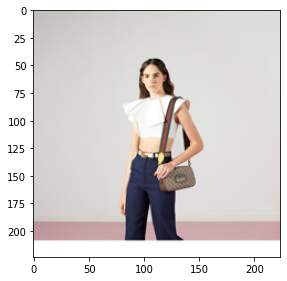

In [96]:
# label이 가질 label names 지정(0:channel, 1:gucci, ...)
Dict =  ["channel","gucci"]

plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.imshow(train_imgs[1])
plt.title("Label1 : {}".format(Dict[train_labels[1]]))
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(train_imgs[2])
plt.title("Label2 : {}".format(Dict[train_labels[2]]))
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(train_imgs[3])
plt.title("Label3 : {}".format(Dict[train_labels[3]]))
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(train_imgs[20])
plt.title("Label4 : {}".format(Dict[train_labels[20]]))
plt.axis('off')
plt.show()


#### 1.3. Load VGG16 Model

- 기존 vgg16은 마지막 layer가 1000개임.
- 우리는 input layer와 output layer만 우리가 조정할 예정.

In [98]:
# 모델 불러오기
model_type = tf.keras.applications.vgg16
base_model = model_type.VGG16()

# 기존에 기억하던 weights를 손상주지 않기 위해 동결
base_model.trainable = False

# 각 layer 보기
# base_model.summary()

# 보는 법
# - param : 파라미터 개수
# - Output Shape : [(None, 224, 224, 3)]
# - Trainable params: 0 → trainable한 파라미터의 개수가 있는지, 우리는 False로 설정했다.

#### 1.4. Testing for Target Data (생략 가능 - 그냥 이해·확인용)

In [ ]:
# idx = np.random.randint(n_test)
# # 기존 모델의 input, output을 설정하지 않고 실행한다.
# pred = base_model.predict(test_imgs[idx].reshape(-1, 224, 224, 3))
# label = model_type.decode_predictions(pred)[0]

# print('%s (%.2f%%)' % (label[0][1], label[0][2]*100))
# print('%s (%.2f%%)' % (label[1][1], label[1][2]*100))
# print('%s (%.2f%%)' % (label[2][1], label[2][2]*100))
# print('%s (%.2f%%)' % (label[3][1], label[3][2]*100))
# print('%s (%.2f%%)' % (label[4][1], label[4][2]*100))
    
# plt.figure(figsize = (6,6))
# plt.imshow(test_imgs[idx])
# plt.title("Label : {}".format(Dict[test_labels[idx]]))
# plt.axis('off')
# plt.show()    

# # 결과를 보면 sandal(39.36%), hand_blower(11.08%), gasmask (10.12%)등 일치하지 않음을 볼 수 있다.

#### 2. Learn From Scratchm

In [ ]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters = 32, 
#                            kernel_size = (3,3), 
#                            activation = 'relu',
#                            padding = 'SAME',
#                            input_shape = (224, 224, 3)), #input으로 들어가는 이미지의 크기(224,224)와 색(3rgb)
    
#     tf.keras.layers.MaxPool2D((2,2)),
    
#     tf.keras.layers.Conv2D(filters = 64, 
#                            kernel_size = (3,3), 
#                            activation = 'relu',
#                            padding = 'SAME'),
    
#     tf.keras.layers.MaxPool2D((2,2)),
    
#     tf.keras.layers.Conv2D(filters = 64, 
#                            kernel_size = (3,3), 
#                            activation = 'relu',
#                            padding = 'SAME'),
    
#     tf.keras.layers.MaxPool2D((2,2)),
    
#     tf.keras.layers.Conv2D(filters = 64, 
#                            kernel_size = (3,3), 
#                            activation = 'relu',
#                            padding = 'SAME'),
    
#     tf.keras.layers.MaxPool2D((2,2)),
    
#     tf.keras.layers.Flatten(),
    
#     tf.keras.layers.Dense(units = 128, activation = 'relu'),
    
#     tf.keras.layers.Dense(units = 4, activation = 'softmax')
# ])

In [ ]:
# model.compile(optimizer = 'adam',
#               loss = 'sparse_categorical_crossentropy',
#               metrics = 'accuracy')

In [ ]:
# model.fit(train_imgs, train_labels, batch_size = 10, epochs = 10)

In [ ]:
# test_loss, test_acc = model.evaluate(test_imgs, test_labels)

### 3. Transfer Learning
#### 3.1. Pre-trained Weights, Biases

In [99]:
# base모델의 가중치를 다 가져와서 모델을 만들었음
vgg16_weights = base_model.get_weights()

# vgg16_weights # 가중치 확인

#### 3.2. Build a Transfer Learning Model

In [100]:
# 마지막 레이어 전까지 가져옴
fc2_layer = base_model.layers[-2].output

# # 중간에 layer 더 쌓을 수 있음
hidden1 = tf.keras.layers.Dense(units = 10, activation = 'relu')(fc2_layer)

# 마지막 레이어를 쌓아줌 
# units : label개수(이진분류 : 2, 다진분류 : n) / activation은 그게 맞는 활성함수 지정
output = tf.keras.layers.Dense(units = 2, activation = 'sigmoid')(fc2_layer)

# 모델을 새로 정의해준다. 
model = tf.keras.Model(inputs = base_model.inputs, outputs = output)

# Trainable params: 16,388
# Non-trainable params: 134,260,544
# 우리가 설정한 마지막 층만 Trainable함을 알 수 있음

In [ ]:
# model.summary()

#### 3.3. Define Loss and Optimizer

In [101]:
# 다진분류라서 아래와 같이 설정한 것임
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### 3.4. Optimize

In [ ]:
# train_labels
# train_imgs[0].shape
# train_imgs.shape
# train_labels.shape

In [146]:
# batch_size = k, epochs = n 설정하기기
history = model.fit(train_imgs, train_labels, batch_size = 50, epochs = 50,)

Epoch 1/50
10/10 [==============================] - 11s 711ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 2/50
10/10 [==============================] - 3s 288ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 3/50
10/10 [==============================] - 3s 290ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 4/50
10/10 [==============================] - 3s 287ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 5/50
10/10 [==============================] - 3s 286ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 6/50
10/10 [==============================] - 3s 282ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 7/50
10/10 [==============================] - 3s 280ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 8/50
10/10 [==============================] - 3s 280ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 9/50
10/10 [==============================] - 3s 279ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 10/50
10/10 [==============================] - 3s 277ms/step - loss: 0.0033 - accuracy: 1.000

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

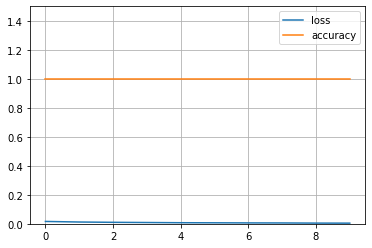

In [107]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1.5)
plt.show()

#### 3.5. Test and Evaluate

In [147]:
# loss와 accuracy 확인
test_loss, test_acc = model.evaluate(test_imgs, test_labels)

6/6 [==============================] - 1s 139ms/step - loss: 0.1895 - accuracy: 0.9333


1/1 [==============================] - 0s 16ms/step


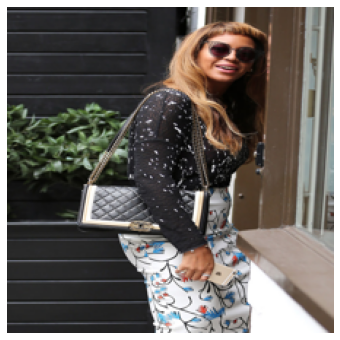

Prediction : gucci


In [156]:
# test_x = random.choice(test_imgs).reshape(-1,224,224,3)
test_x = test_imgs[np.random.choice(n_test, 1)]
pred = np.argmax(model.predict(test_x))

plt.figure(figsize = (6,6))
plt.imshow(test_x.reshape(224, 224, 3))
plt.axis('off')
plt.show()

print('Prediction : {}'.format(Dict[pred]))

### 새로운 데이트로 테스트

In [157]:
import glob
from PIL import Image
import numpy as np

1/1 [==============================] - 0s 16ms/step


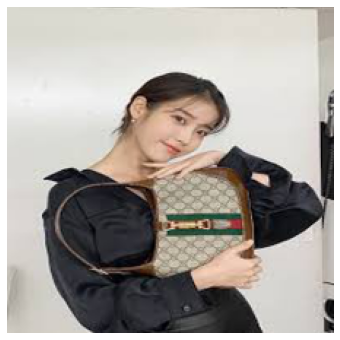

Prediction : gucci


In [170]:
# test_x = random.choice(test_imgs).reshape(-1,224,224,3)
# 
# img = Image.open("/gdrive/MyDrive/Colab Notebooks/data_files/test (1).jpg")      #폴더를 열어주고 이미지를 읽음
# img = Image.open("/gdrive/MyDrive/Colab Notebooks/data_files/test (2).jpg")      #폴더를 열어주고 이미지를 읽음
# img = Image.open("/gdrive/MyDrive/Colab Notebooks/data_files/test (3).jpg")      #폴더를 열어주고 이미지를 읽음
# img = Image.open("/gdrive/MyDrive/Colab Notebooks/data_files/test (4).jpg")      #폴더를 열어주고 이미지를 읽음
# img = Image.open("/gdrive/MyDrive/Colab Notebooks/data_files/test (5).jpg")      #폴더를 열어주고 이미지를 읽음
# img = Image.open("/gdrive/MyDrive/Colab Notebooks/data_files/test (6).jpg")      #폴더를 열어주고 이미지를 읽음
# img = Image.open("/gdrive/MyDrive/Colab Notebooks/data_files/test (7).jpg")      #폴더를 열어주고 이미지를 읽음
# img = Image.open("/gdrive/MyDrive/Colab Notebooks/data_files/test (8).jpg")      #폴더를 열어주고 이미지를 읽음
# img = Image.open("/gdrive/MyDrive/Colab Notebooks/data_files/test (9).jpg")      #폴더를 열어주고 이미지를 읽음
# img = Image.open("/gdrive/MyDrive/Colab Notebooks/data_files/test (10).jpg")      #폴더를 열어주고 이미지를 읽음
img = img.convert("RGB")   #RGB로 바꿈
img = img.resize((224, 224))
test_x = np.asarray(img)
test_x = test_x.reshape(-1,224,224,3) 

pred = np.argmax(model.predict(test_x))

plt.figure(figsize = (6,6))
plt.imshow(test_x.reshape(224, 224, 3))
plt.axis('off')
plt.show()

print('Prediction : {}'.format(Dict[pred]))